In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traffic_df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
traffic_df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,9/30/18 19:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,9/30/18 20:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,9/30/18 21:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,9/30/18 22:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,9/30/18 23:00,954


### Description of the column categories 
- holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp: Numeric Average temp in kelvin
- rain_1h: numeric amount in mm of rain that occured in the hour
- snow_1h: numeric amount in mm of snow that occurred in the hour 
- clouds_all: numeric percentage of cloud cover
- weather_main: categorical short textual description of the current weather
- weather_description: categorical longer textual description of the current weather
- date_time: DateTime hour of the data collected in local CST Time 
- traffic_volume:  Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [4]:
# replace holiday with numeric values to represent a holiday = 1 and non-holiday = 0
traffic_df["holiday"] = traffic_df["holiday"].replace('None', 0)
traffic_df["holiday"] = traffic_df["holiday"].replace("Columbus Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Veterans Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Thanksgiving Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Christmas Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("New Years Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Washingtons Birthday", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Memorial Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Independence Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Labor Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("Martin Luther King Jr Day", 1)
traffic_df["holiday"] = traffic_df["holiday"].replace("State Fair", 1)

In [5]:
traffic_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/12 9:00,5545
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/12 10:00,4516
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/12 11:00,4767
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/12 12:00,5026
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/12 13:00,4918


(array([  10.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,   99.,  936., 2205., 3324., 6422., 8120.,
        5700., 8685., 8835., 3583.,  285.]),
 array([  0.    ,   6.2014,  12.4028,  18.6042,  24.8056,  31.007 ,
         37.2084,  43.4098,  49.6112,  55.8126,  62.014 ,  68.2154,
         74.4168,  80.6182,  86.8196,  93.021 ,  99.2224, 105.4238,
        111.6252, 117.8266, 124.028 , 130.2294, 136.4308, 142.6322,
        148.8336, 155.035 , 161.2364, 167.4378, 173.6392, 179.8406,
        186.042 , 192.2434, 198.4448, 204.6462, 210.8476, 217.049 ,
        223.2504, 229.4518, 235.6532, 241.8546, 248.056 , 254.2574,
        260.4588, 266.6602, 272.8616, 279.063 , 285.2644, 291.4658,
        297.6672, 303.8686, 310.07  ]),
 <a list of 50 P

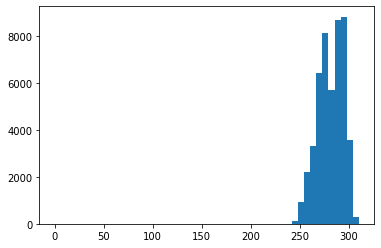

In [6]:
plt.hist(traffic_df["temp"], bins = 50)

In [7]:
print(traffic_df["temp"][0])

288.28


In [8]:
def to_farenheit(X): 
    F_x = X - 237.00
    F_x = (1.8 * (F_x)) + 32.0
    
    return float(F_x)

In [9]:

traffic_df["temp"] = traffic_df['temp'].apply(to_farenheit)

In [10]:
#remove points that have missing temperature data
traffic_df = traffic_df[traffic_df['temp'] > 0]

(array([  355.,  1479.,  2702.,  4829.,  9476.,  6050.,  8212., 10312.,
         4416.,   363.]),
 array([ 43.502 ,  55.5044,  67.5068,  79.5092,  91.5116, 103.514 ,
        115.5164, 127.5188, 139.5212, 151.5236, 163.526 ]),
 <a list of 10 Patch objects>)

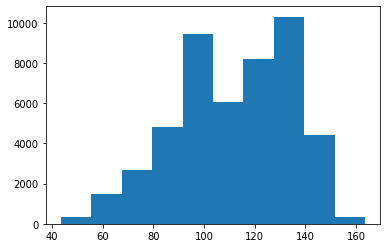

In [11]:
plt.hist(traffic_df['temp'])

In [12]:
traffic_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,124.304,0.0,0.0,40,Clouds,scattered clouds,10/2/12 9:00,5545
1,0,126.248,0.0,0.0,75,Clouds,broken clouds,10/2/12 10:00,4516
2,0,126.644,0.0,0.0,90,Clouds,overcast clouds,10/2/12 11:00,4767
3,0,127.634,0.0,0.0,90,Clouds,overcast clouds,10/2/12 12:00,5026
4,0,129.452,0.0,0.0,75,Clouds,broken clouds,10/2/12 13:00,4918


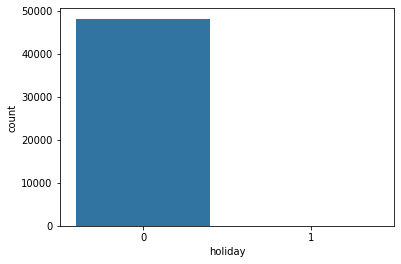

In [13]:
sns.countplot(traffic_df['holiday'])

In [14]:
rainy_df = traffic_df[traffic_df['rain_1h'] > 0]

In [15]:
rainy_df["rain_1h"].describe()

count    3467.000000
mean        4.647494
std       166.970323
min         0.250000
25%         0.250000
50%         0.640000
75%         1.780000
max      9831.300000
Name: rain_1h, dtype: float64

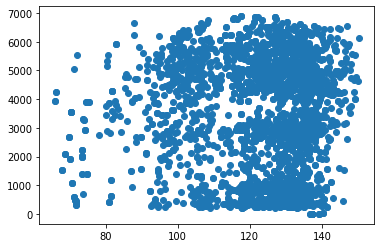

In [16]:
#scatterplot of the temperature of rainy day (rain >= .25mm) and the traffic volume
plt.scatter(rainy_df['temp'], rainy_df['traffic_volume'])

In [17]:
snowy_df = traffic_df[traffic_df['snow_1h'] > 0]

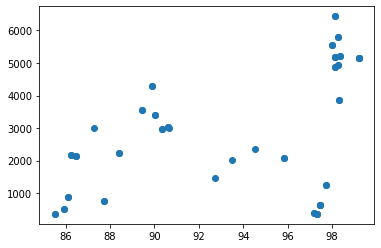

In [18]:
#scatterplot of the temperature of a snow day (snow fall > 0) and the traffic volume
plt.scatter(snowy_df['temp'], snowy_df['traffic_volume'])

In [19]:
cloudy_df = 

SyntaxError: invalid syntax (<ipython-input-19-4d99e2e5da5e>, line 1)